# Sigma-transverse - Main plots of Pval weighting with runs 700000 to 756268  

# analysis of pp-SRC c.m. momentum simulations

In [1]:
from notebook_tools import *
%matplotlib inline

In [2]:
nominal_values=dict({'SigmaT_C12':0.167,'SigmaT_err_C12':0.006,
                     'a1_C12':0.143,'a1_err_C12':0.075,'a2_C12':0.158,'a2_err_C12':0.009,
                     'b1_C12':0.562,'b1_err_C12':0.078,'b2_C12':0.159,'b2_err_C12':0.009})

In [5]:
sims70=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs700000to756268_100SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')
sims70=sims70[(sims70.index!=14582) & (sims70.index!=22926) & (sims70.index!=40831)]

In [7]:
sims=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1000000to1400000_results.csv')

In [33]:
def draw_PvalWeighting(sims=None,
                       var='SigmaX', xlabel='$\\sigma_{x}$ [GeV/c]',bins=50,target='12C',name='$^{12}C$',
                       PvalTotWeight=None,legend_loc='bbox',                       
                       x_range = None, y_range = None,                       
                       x_text = 0.1 , y_text=None,                       
                       do_save_fig=False,
                       figsize=(10,10),                       
                       fontsize=20,
                       weights=None,
                       weighting_labels=None):
        

    print '--------------\n',target,'\n--------------'
    
    h_weights , h_weighting_labels = [] , []
    for weight,weighting_label in zip(weights,weighting_labels):
        if np.sum(weight)>0:
            h_weights.append(weight)
            h_weighting_labels.append(weighting_label)
            mu = np.average(sims['gen'+var] , weights=weight)
            variance = np.average((sims['gen'+var]-mu)**2, weights=weight)
            sigma = np.sqrt(variance)                                                                           
            print weighting_label + ': %.3f \pm %.3f'%(mu,sigma)
        else:
            print weighting_label + ' weights sum up to 0'
    
    fig,ax=plt.subplots(figsize=(10,10))
    for weight,weighting_label in zip(h_weights,h_weighting_labels):

        h,bins,_ = plt.hist(sims['gen'+var],
                            weights=weight,
                            label=weighting_label,                
                            bins=bins,
                            normed=1,
                            histtype='step',linewidth=2);
        if 0.7*np.max(h)>y_text: y_text=0.7*np.max(h) 
    set_axes(ax,x_label=xlabel,y_label='weighted number of runs [a.u.]',fontsize=fontsize)
    plt.legend(fontsize=fontsize,loc=legend_loc)
    
    ax.set_xlim(x_range)
    plt.text(x_text,y_text,name,fontsize=40)
    if do_save_fig: 
        plt.tight_layout()
        plt.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/AcceptanceCorrection'+var+'_'+target+'.pdf')


In [83]:
for target in ['12C','27Al','56Fe','208Pb']:
    sims70['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([sims70['PvalSigmaX_unweighted_%s'%target],
                                                                   sims70['PvalSigmaY_unweighted_%s'%target],
                                                                   sims70['PvalSigmaZa1_unweighted_%s'%target],
                                                                   sims70['PvalSigmaZa2_unweighted_%s'%target], 
                                                                   sims70['PvalMeanZa1_unweighted_%s'%target],
                                                                   sims70['PvalMeanZa2_unweighted_%s'%target]         
                                                                  ])


--------------
12C 
--------------
generated: 0.209 \pm 0.080
weighted by $Pval(\sigma_x)$: 0.151 \pm 0.019
weighted by $Pval(tot)$: 0.153 \pm 0.016
PvalTotal_weighted: 0.153 \pm 0.017
PvalTotal: 0.153 \pm 0.016
weighted by $KS-p_t$: 0.147 \pm 0.017
--------------
27Al 
--------------
generated: 0.209 \pm 0.080
weighted by $Pval(\sigma_x)$: 0.143 \pm 0.023
weighted by $Pval(tot)$: 0.154 \pm 0.022
PvalTotal_weighted: 0.151 \pm 0.026
PvalTotal: 0.154 \pm 0.022
--------------
56Fe 
--------------
generated: 0.209 \pm 0.080
weighted by $Pval(\sigma_x)$: 0.161 \pm 0.021
weighted by $Pval(tot)$: 0.169 \pm 0.015
PvalTotal_weighted: 0.167 \pm 0.017
PvalTotal: 0.169 \pm 0.015
--------------
208Pb 
--------------
generated: 0.209 \pm 0.080
weighted by $Pval(\sigma_x)$: 0.186 \pm 0.026
weighted by $Pval(tot)$: 0.172 \pm 0.021
PvalTotal_weighted: 0.171 \pm 0.019
PvalTotal: 0.172 \pm 0.021


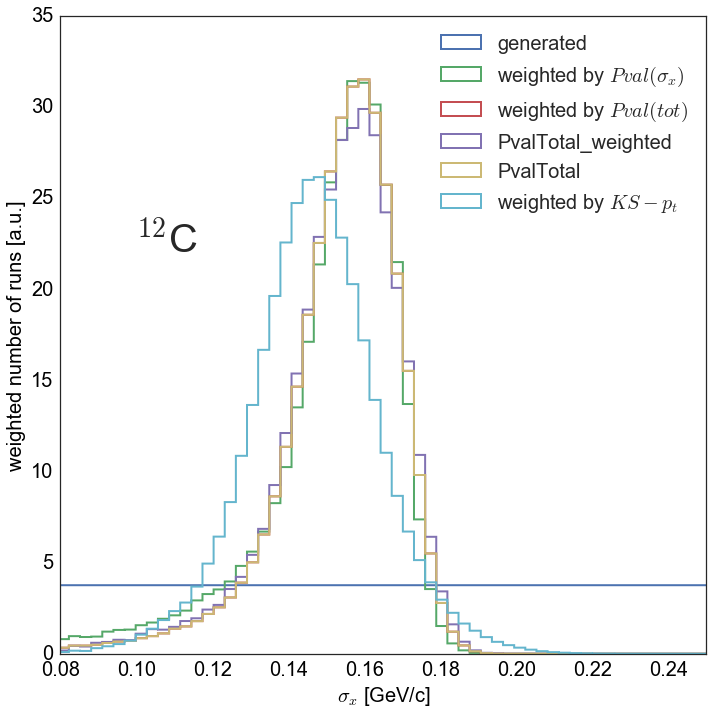

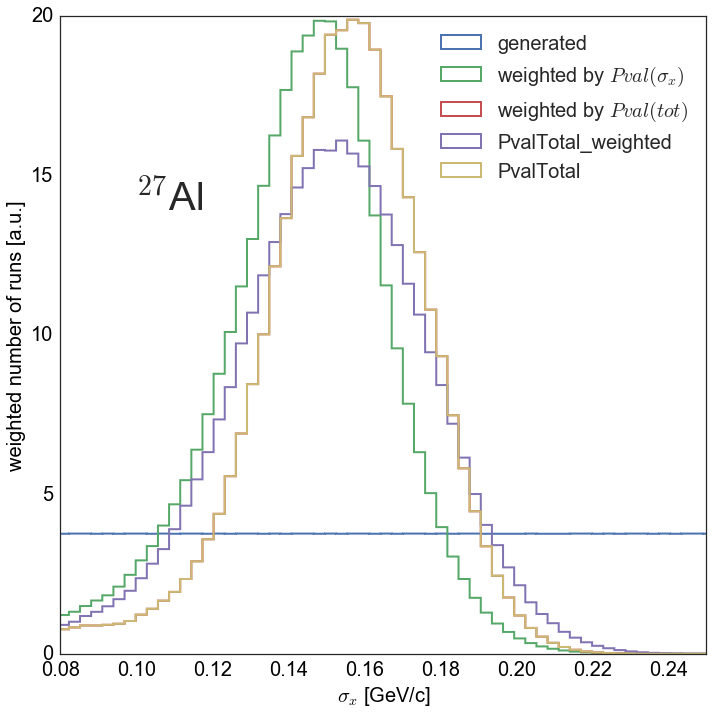

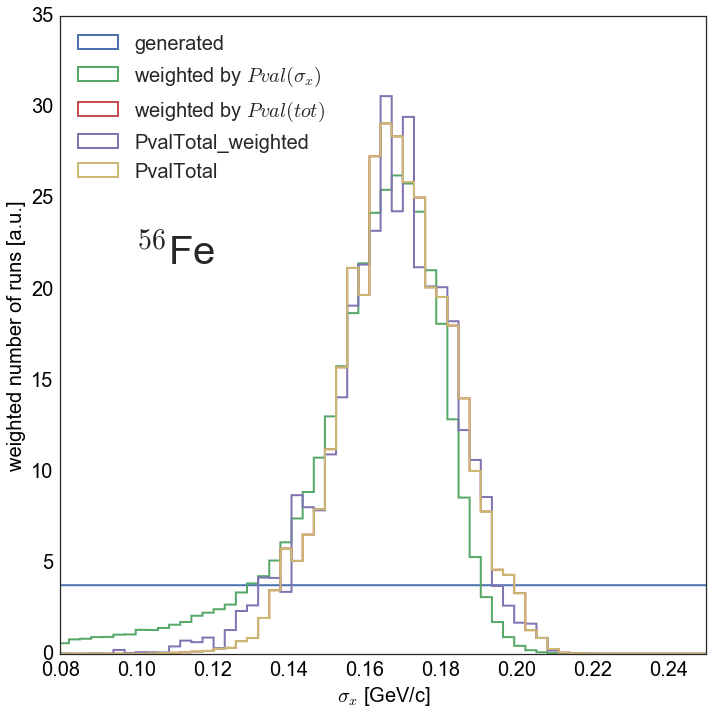

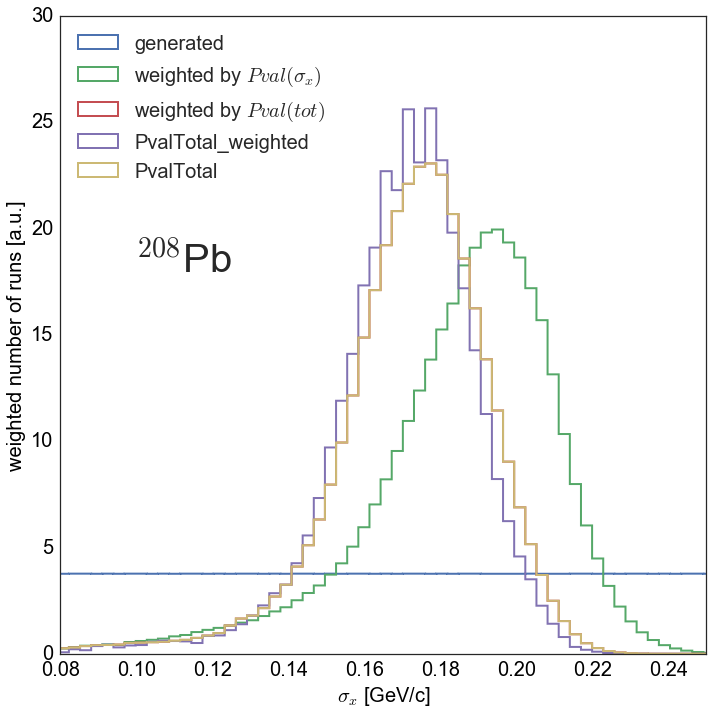

In [85]:

for target,name in zip(['12C','27Al','56Fe','208Pb']
                       ,['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']
                      ):
    weights=[ np.ones(len(sims70)),
        sims70['PvalSigmaX_unweighted_'+target] , sims70['PvalTotal_unweighted_'+target] ,
        sims70['PvalTotal_weighted_'+target] ,
        sims70['PvalTotal_'+target],        
    ]
    weighting_labels = [ 'generated',
        'weighted by $Pval(\\sigma_x)$', 'weighted by $Pval(tot)$',
        'PvalTotal_weighted',
        'PvalTotal',
    ]

    if target=='12C':
        weights.append(sims70['KStPval'])
        weighting_labels.append('weighted by $KS-p_t$')
        
    draw_PvalWeighting(sims=sims70,
                       var='SigmaX',xlabel='$\\sigma_{x}$ [GeV/c]',
                       bins=np.linspace(0.05,0.34,100),
                       x_range=(0.08,0.25),
                       target=target,name=name,
                       legend_loc='upper left' if target=='56Fe' or target=='208Pb' else 'best',
                       weights=weights,
                       weighting_labels=weighting_labels,
                       do_save_fig=True)

--------------
208Pb 
--------------
generatedweighted by $Pval(\sigma_x)$: 0.150 \pm 0.059
weighted by $Pval(tot)$: 0.177 \pm 0.032
PvalTotal_weighted: 0.158 \pm 0.030
PvalTotal: 0.160 \pm 0.027
Pval_tw: 0.162 \pm 0.029
PvalTot_tw: 0.177 \pm 0.032
PvalTotal_tw: 0.177 \pm 0.032


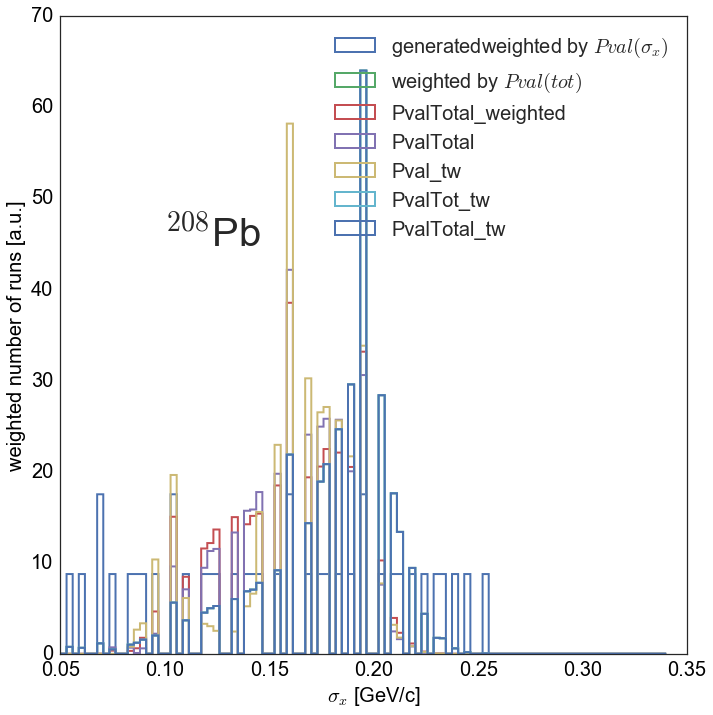

In [36]:

weights=[np.ones(len(sims)),
         sims['PvalSigmaX_unweighted_'+target] , 
         sims['PvalTotal_unweighted_'+target] ,
        sims['PvalTotal_weighted_'+target] ,
        sims['PvalTotal_'+target],
        sims['PvalSigmaX_tw_'+target],
        sims['PvalTot_tw_'+target],  
        sims['PvalTotal_tw_'+target],        
    ]
weighting_labels = [ 'generated'
                    'weighted by $Pval(\\sigma_x)$', 'weighted by $Pval(tot)$',

                    'PvalTotal_weighted',

                    'PvalTotal',

                    'Pval_tw',

                    'PvalTot_tw',

                    'PvalTotal_tw',        
    ]
draw_PvalWeighting(sims=sims,                       
                   bins=np.linspace(0.05,0.34,100),                   
#                    x_range=(0.08,0.25),                   
                   target=target,name=name,                   
                   weights=weights,                   
                   weighting_labels=weighting_labels,                   
                   do_save_fig=True)

0.14047459334236573

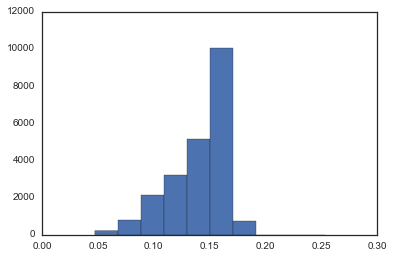

In [74]:
weights=Fisher_combination_Pvals_pandas([sims.PvalSigmaX_unweighted_12C])
plt.hist(sims.genSigmaX,weights=weights);
np.average(sims.genSigmaX,weights=weights)

In [66]:
for target in ['12C','27Al','56Fe','208Pb']:
    sims['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_unweighted_%s'%target],
                                                                   sims['PvalSigmaY_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa1_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa2_unweighted_%s'%target], 
                                                                   sims['PvalMeanZa1_unweighted_%s'%target],
                                                                   sims['PvalMeanZa2_unweighted_%s'%target]         
                                                                  ])

    sims['PvalTot_tw_%s'%target] = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_tw_%s'%target],
                                                                   sims['PvalSigmaY_tw_%s'%target],
#                                                                    sims['PvalSigmaZa1_tw_%s'%target],
#                                                                    sims['PvalSigmaZa2_tw_%s'%target], 
                                                                   sims['PvalMeanZa1_tw_%s'%target],
                                                                   sims['PvalMeanZa2_tw_%s'%target]         
                                                                  ])



